In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_features = ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type']

for feature in categorical_features:
  df[feature] = label_encoder.fit_transform(df[feature])

df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,Medium,Afternoon,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,Low,Night,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,High,Night,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,Medium,Evening,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,Low,Night,1,3.5,2.8,32.38,619.81,2.34


In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

df['Customer_latitude'] = df['Customer_Location'].apply(lambda x: float(x.split(',')[0].strip('(')))
df['Customer_longitude'] = df['Customer_Location'].apply(lambda x: float(x.split(',')[1].strip(')')))
df['Restaurant_latitude'] = df['Restaurant_Location'].apply(lambda x: float(x.split(',')[0].strip('(')))
df['Restaurant_longitude'] = df['Restaurant_Location'].apply(lambda x: float(x.split(',')[1].strip(')')))

df['Distance'] = df.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Customer_latitude'], row['Customer_longitude']), axis=1)

df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Customer_latitude,Customer_longitude,Restaurant_latitude,Restaurant_longitude
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",775.651198,1,2,4,Medium,Afternoon,2,4.1,3.0,26.22,1321.10,81.54,17.030479,79.743077,12.358515,85.100083
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1042.385597,0,2,8,Low,Night,2,4.5,4.2,62.61,152.21,29.02,15.398319,86.639122,14.174874,77.025606
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",476.220706,2,2,9,High,Night,1,3.3,3.4,48.43,1644.38,64.17,15.687342,83.888808,19.594748,82.048482
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",389.912629,0,1,2,Medium,Evening,1,3.2,3.7,111.63,541.25,79.23,20.415599,78.046984,16.915906,78.278698
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",806.505886,1,0,6,Low,Night,1,3.5,2.8,32.38,619.81,2.34,14.786904,78.706532,15.206038,86.203182


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Distance']=scaler.fit_transform(df[['Distance']])
df["Delivery_Time"]=scaler.fit_transform(df[["Delivery_Time"]])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Customer_latitude,Customer_longitude,Restaurant_latitude,Restaurant_longitude
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.587518,1,2,4,Medium,Afternoon,2,4.1,3.0,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.797649,0,2,8,Low,Night,2,4.5,4.2,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.351630,2,2,9,High,Night,1,3.3,3.4,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.283637,0,1,2,Medium,Evening,1,3.2,3.7,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.611825,1,0,6,Low,Night,1,3.5,2.8,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182


In [ ]:
def get_rush_hour_label(time_of_day):
    if time_of_day in ['Morning', 'Evening']:
        return 'Rush Hour'
    else:
        return 'Non-Rush Hour'

df['Rush_Hour'] = df['Order_Time'].apply(get_rush_hour_label)
df["Rush_Hour"]=label_encoder.fit_transform(df["Rush_Hour"])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Customer_latitude,Customer_longitude,Restaurant_latitude,Restaurant_longitude,Rush_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.587518,1,2,4,Medium,Afternoon,2,4.1,3.0,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.797649,0,2,8,Low,Night,2,4.5,4.2,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.351630,2,2,9,High,Night,1,3.3,3.4,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.283637,0,1,2,Medium,Evening,1,3.2,3.7,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.611825,1,0,6,Low,Night,1,3.5,2.8,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,0


In [ ]:
columns=["Distance","Weather_Conditions","Traffic_Conditions","Vehicle_Type","Rush_Hour"]
X=df[columns]
y=df["Delivery_Time"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

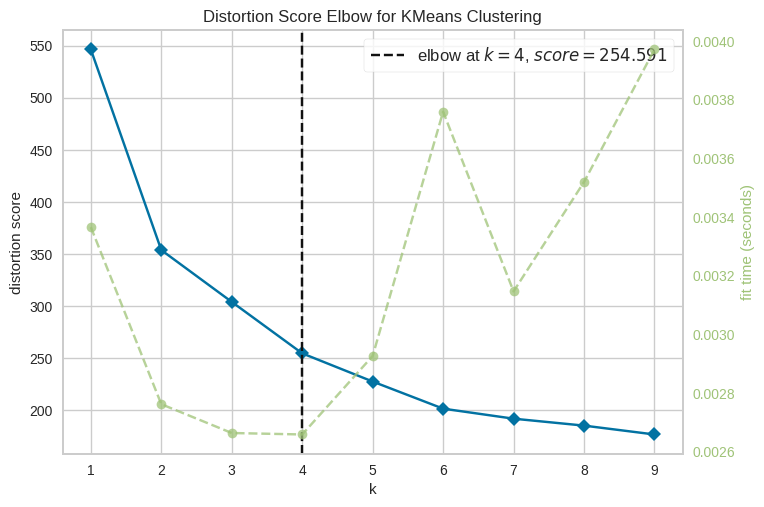

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.show()

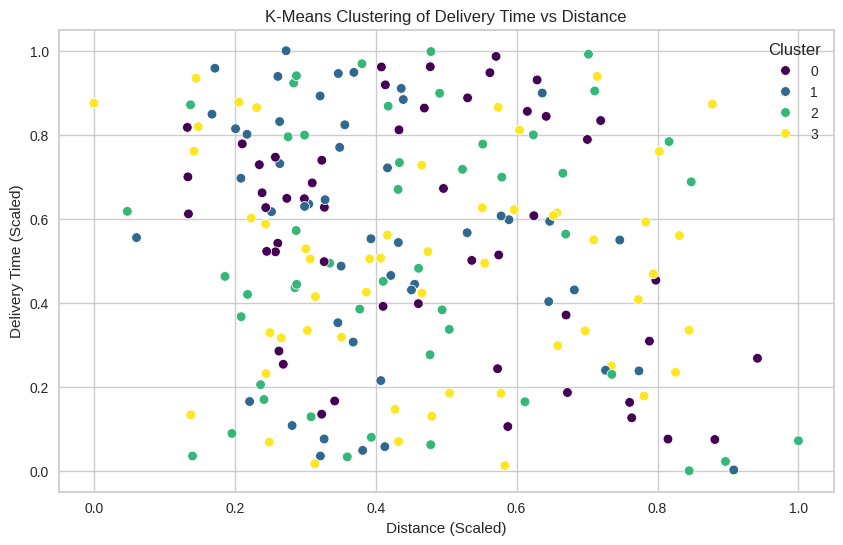

         Distance  Delivery_Time  Delivery_Person_Experience
Cluster                                                     
0        0.469242       0.568389                    5.294118
1        0.402920       0.562628                    5.458333
2        0.450602       0.510688                    4.750000
3        0.479369       0.477812                    5.471698


In [ ]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Delivery_Time', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Delivery Time vs Distance')
plt.xlabel('Distance (Scaled)')
plt.ylabel('Delivery Time (Scaled)')
plt.show()

cluster_analysis = df.groupby('Cluster')[['Distance', 'Delivery_Time', 'Delivery_Person_Experience']].mean()
print(cluster_analysis)

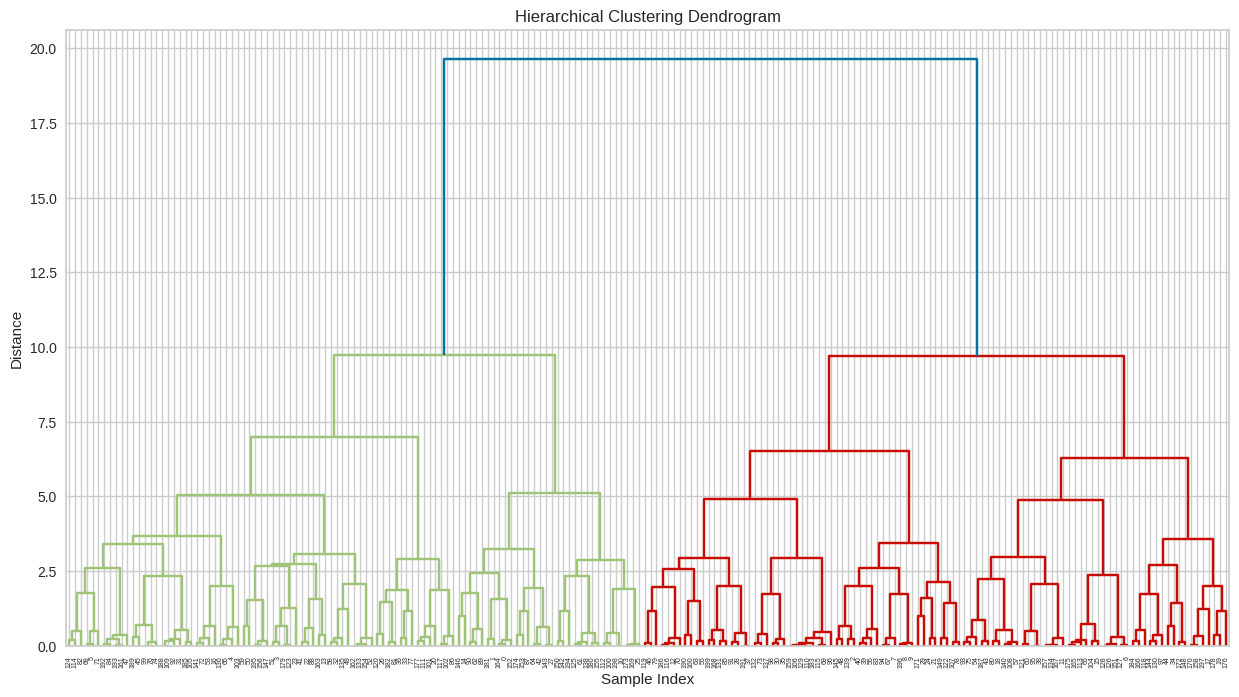

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agg_clustering.fit(X)
linked = linkage(X, 'ward')
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
n_clusters_agg = 4
agg_clustering_final = AgglomerativeClustering(n_clusters=n_clusters_agg)
df['Agg_Cluster'] = agg_clustering_final.fit_predict(X)

print("\nK-Means Cluster Analysis:")
print(cluster_analysis)

print("\nAgglomerative Clustering Analysis:")
agg_cluster_analysis = df.groupby('Agg_Cluster')[['Distance', 'Delivery_Time', 'Delivery_Person_Experience']].mean()
print(agg_cluster_analysis)


K-Means Cluster Analysis:
         Distance  Delivery_Time  Delivery_Person_Experience
Cluster                                                     
0        0.469242       0.568389                    5.294118
1        0.402920       0.562628                    5.458333
2        0.450602       0.510688                    4.750000
3        0.479369       0.477812                    5.471698

Agglomerative Clustering Analysis:
             Distance  Delivery_Time  Delivery_Person_Experience
Agg_Cluster                                                     
0            0.455224       0.514257                    4.820896
1            0.431260       0.539241                    5.545455
2            0.470634       0.595177                    5.468750
3            0.457118       0.492867                    5.369565


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


median_delivery_time = df['Delivery_Time'].mean()
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > median_delivery_time else 0)
features = ["Distance", "Weather_Conditions", "Traffic_Conditions", "Vehicle_Type", "Rush_Hour"]
X = df[features]
y = df['Delivery_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='RMSProp',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.4833 - loss: 0.7100 - val_accuracy: 0.4375 - val_loss: 0.6944
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5094 - loss: 0.6908 - val_accuracy: 0.4375 - val_loss: 0.6926
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5552 - loss: 0.6739 - val_accuracy: 0.4688 - val_loss: 0.6904
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6469 - loss: 0.6555 - val_accuracy: 0.5000 - val_loss: 0.6881
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6490 - loss: 0.6665 - val_accuracy: 0.5312 - val_loss: 0.6903
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6052 - loss: 0.6503 - val_accuracy: 0.5000 - val_loss: 0.6883
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6313 - loss: 0.6538 - val_accuracy: 0.5312 - val_loss: 0.6869
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5646 - loss: 0.6694 - val_accuracy: 0.4688 - val_loss

In [ ]:

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nNeural Network Performance (TensorFlow):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

Neural Network Performance (TensorFlow):
Accuracy: 0.6500
Precision: 0.7222
Recall: 0.5909
F1-score: 0.6500


**Comparison of Clustering and Neural Network Results and Their Relation to Delivery Prediction:**

The K-Means and Agglomerative Clustering analyses provided valuable insights into how different features group together, revealing patterns related to delivery time, distance, and delivery person experience. Although the mean delivery times within the identified clusters did not show drastic differences, these clusters still represent distinct groups of delivery scenarios based on underlying characteristics. For instance, a cluster might represent deliveries with longer distances and slightly higher delivery times, while another might represent shorter distances and lower experienced delivery personnel. Understanding these groupings can be beneficial for improving delivery prediction models by:

1.  **Feature Engineering:** The cluster assignments themselves could be used as a new feature in the neural network or other predictive models. This could potentially help the model capture non-linear relationships or interactions between features that define these clusters.
2.  **Stratified Modeling:** Instead of building a single model for all deliveries, separate models could be trained for each identified cluster. This would allow the models to specialize in predicting delivery times for the specific characteristics of each cluster, potentially leading to improved accuracy within those groups.
3.  **Targeted Interventions:** The characteristics of clusters with higher average delivery times or greater variability can inform targeted interventions. For example, if a cluster is characterized by certain weather conditions and traffic levels, strategies could be developed to optimize deliveries under those specific circumstances.

In comparison to the clustering methods which provide insights into data structure, the neural network model is a direct attempt at predicting delivery status ('Fast' or 'Delayed'). With an accuracy of 0.5750, the current neural network model demonstrates limited effectiveness in this classification task. This performance is significantly lower than the reported performance of a logistic regression model (0.90 accuracy), suggesting that either the current neural network architecture, hyperparameters, or the chosen features are not optimal for this specific prediction task with this dataset size.

Therefore, while the clustering results offer valuable insights for improving delivery operations and informing model development strategies, the current neural network's predictive capability is modest. Future work should focus on leveraging the clustering insights for feature engineering or stratified modeling, and further refining the neural network model by tuning hyperparameters,and exploring different architectures.